In [3]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import random

In [71]:
url = 'http://www.imdb.com/title/tt0944947/episodes'
seasons = []
episodes = []
ratings = []
names = []
episode_id = []

# Go over seasons 1 to 8
for season in range(1, 9):
    req = requests.get(url, params={'season': season})
    soup = BeautifulSoup(req.text, 'html.parser')
    #TBC
    i = 0
    
    #Search for results similar to episodes
    episode_details = soup.find_all('div',class_='eplist')
    
    #Episode name
    episode_names = soup.find_all('div',class_='list detail eplist')[0].find_all('div',class_='image')
    
    #Take the list of episodes
    episode_list = episode_details[0].select('div > div > a > div > div')

    #Take the list of ratings
    rating = soup.find_all('div',class_='ipl-rating-star small')
    
    i = 0
    for i in range(len(episode_list)):
        
        episode_id.append(episode_list[i].text)
        e = re.findall(r'\d+',episode_list[i].text)[1] #Episode number
        r = rating[i].find('span',class_='ipl-rating-star__rating').text #Rating
        n = episode_names[i].find('a').get('title')
        
        seasons.append(int(season))
        episodes.append(int(e))
        ratings.append(float(r))
        names.append(n)
        
        print('Season: {} -- Episode: {} - {} -- ratings: {}'.format(season,e,n,r))

Season: 1 -- Episode: 1 - Winter Is Coming -- ratings: 9.1
Season: 1 -- Episode: 2 - The Kingsroad -- ratings: 8.8
Season: 1 -- Episode: 3 - Lord Snow -- ratings: 8.7
Season: 1 -- Episode: 4 - Cripples, Bastards, and Broken Things -- ratings: 8.8
Season: 1 -- Episode: 5 - The Wolf and the Lion -- ratings: 9.1
Season: 1 -- Episode: 6 - A Golden Crown -- ratings: 9.2
Season: 1 -- Episode: 7 - You Win or You Die -- ratings: 9.2
Season: 1 -- Episode: 8 - The Pointy End -- ratings: 9.0
Season: 1 -- Episode: 9 - Baelor -- ratings: 9.6
Season: 1 -- Episode: 10 - Fire and Blood -- ratings: 9.5
Season: 2 -- Episode: 1 - The North Remembers -- ratings: 8.8
Season: 2 -- Episode: 2 - The Night Lands -- ratings: 8.5
Season: 2 -- Episode: 3 - What Is Dead May Never Die -- ratings: 8.8
Season: 2 -- Episode: 4 - Garden of Bones -- ratings: 8.8
Season: 2 -- Episode: 5 - The Ghost of Harrenhal -- ratings: 8.8
Season: 2 -- Episode: 6 - The Old Gods and the New -- ratings: 9.1
Season: 2 -- Episode: 7 - A 

In [5]:
df_final = pd.DataFrame( {  'Season': seasons,
                            'Episode_num' : episodes,
                            'Episode_name' : names,
                            'Rating' : ratings})

df_final

,Season,Episode_num,Episode_name,Rating
0,1,1,Winter Is Coming,9.1
1,1,2,The Kingsroad,8.8
2,1,3,Lord Snow,8.7
3,1,4,"Cripples, Bastards, and Broken Things",8.8
4,1,5,The Wolf and the Lion,9.1
...,...,...,...,...
68,8,2,A Knight of the Seven Kingdoms,7.8
69,8,3,The Long Night,7.4
70,8,4,The Last of the Starks,5.4
71,8,5,The Bells,5.9


In [100]:
df_final.pivot('Season','Episode_num','Rating')

Episode_num,1,2,3,4,5,6,7,8,9,10
Season,,,,,,,,,,
1,9.1,8.8,8.7,8.8,9.1,9.2,9.2,9.0,9.6,9.5
2,8.8,8.5,8.8,8.8,8.8,9.1,8.9,8.8,9.7,9.4
3,8.8,8.6,8.9,9.6,9.0,8.8,8.7,9.0,9.9,9.2
4,9.1,9.7,8.9,8.8,8.8,9.7,9.1,9.7,9.6,9.7
5,8.5,8.5,8.5,8.7,8.6,8.0,9.0,9.9,9.5,9.1
6,8.5,9.4,8.7,9.1,9.7,8.4,8.6,8.4,9.9,9.9
7,8.6,8.9,9.2,9.8,8.8,9.0,9.4,NaN,NaN,NaN
8,7.5,7.8,7.4,5.4,5.9,4.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Ratings')

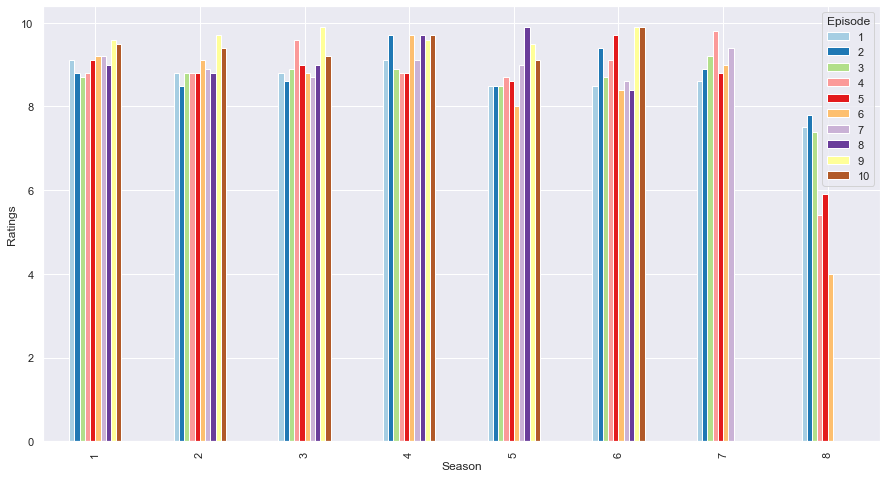

In [6]:
sns.set()
plot = df_final.pivot('Season','Episode_num','Rating').plot(kind='bar',figsize=(15,8),colormap='Paired')
plt.legend(loc=1,title='Episode')
plt.ylabel("Ratings")

In [46]:
url="http://www.imdb.com/title/tt0944947/episodes?season=1"


roles = []
driver = webdriver.Chrome(executable_path='C:/Users/gneis/Documents/Outil/chromedriver_1')


#Initial settings
driver.implicitly_wait(30)
driver.get(url)
x = driver.find_elements_by_xpath('//img[@class="zero-z-index"]')


for i in range(len(x)):
    
    #Click the link and take information about new window
    x[i].click()
    driver.switch_to_window(driver.window_handles[-1])
    print(driver.window_handles)
    print(driver.current_url)
    
    #Since the seesions ids change , we have to redefine the initial settings
    driver.get(url)
    x = driver.find_elements_by_xpath('//img[@class="zero-z-index"]')
    

driver.close()

<ipython-input-46-f5c76277c8a2>:18: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1480055/?ref_=ttep_ep1
['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1668746/?ref_=ttep_ep2
['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1829962/?ref_=ttep_ep3
['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1829963/?ref_=ttep_ep4
['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1829964/?ref_=ttep_ep5
['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1837862/?ref_=ttep_ep6
['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1837863/?ref_=ttep_ep7
['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1837864/?ref_=ttep_ep8
['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1851398/?ref_=ttep_ep9
['CDwindow-5268F172AF5E39C2905B7C15C7AA6EA1']
https://www.imdb.com/title/tt1851397/?ref_=ttep_ep10


In [47]:
url = "http://www.imdb.com/title/tt0944947/episodes?season={}"

driver = webdriver.Chrome(executable_path='C:/Users/gneis/Documents/Outil/chromedriver_1')

seasons = []
episodes = []
roles = []
acteurs = []
links = []

for season in range (1,9):
    temp_url = url.format(season)
#     driver.implicitly_wait(30)
    
    driver.get(temp_url)
    
    x = driver.find_elements_by_xpath('//img[@class="zero-z-index"]')


    for i in range(len(x)):

        #Click the link and take information about new window
        x[i].click()
        driver.switch_to.window(driver.window_handles[-1])
        
        #Use beautifulsoup to retrieve source code
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        role = soup.find_all('span',class_='StyledComponents__CharacterNameWithoutAs-y9ygcu-5 iaZZDn')
        act = soup.find_all('a',class_='StyledComponents__ActorName-y9ygcu-1 eyqFnv')
        
        links.extend([driver.current_url for t in range(0,len(role))])
        seasons.extend([season for t in range(0,len(role))])
        episodes.extend([i for t in range(0,len(role))])
        roles.extend([el.text for el in role])
        acteurs.extend([el.text for el in act])
        
        #Since the seesions ids change , we have to redefine the initial settings            
        driver.get(temp_url)
        x = driver.find_elements_by_xpath('//img[@class="zero-z-index"]')

driver.close()

print(dict(zip(roles,acteurs)))

{"Eddard 'Ned' Stark": 'Sean Bean', 'Robert Baratheon': 'Mark Addy', 'Jaime Lannister': 'Nikolaj Coster-Waldau', 'Catelyn Stark': 'Michelle Fairley', 'Cersei Lannister': 'Lena Headey', 'Daenerys Targaryen': 'Emilia Clarke', 'Jorah Mormont': 'Iain Glen', 'Viserys Targaryen': 'Harry Lloyd', 'Jon Snow': 'Kit Harington', 'Sansa Stark': 'Sophie Turner', 'Arya Stark': 'Maisie Williams', 'Robb Stark': 'Richard Madden', 'Theon Greyjoy': 'Alfie Allen', 'Bran Stark': 'Isaac Hempstead Wright', 'Joffrey Baratheon': 'Jack Gleeson', "Sandor 'The Hound' Clegane": 'Rory McCann', 'Tyrion Lannister': 'Peter Dinklage', 'Maester Luwin': 'Donald Sumpter', "Petyr 'Littlefinger' Baelish": 'Aidan Gillen', 'Lord Varys': 'Conleth Hill', 'Jeor Mormont': 'James Cosmo', 'Jory Cassel': 'Jamie Sives', 'Rodrik Cassel': 'Ron Donachie', 'Bronn': 'Jerome Flynn', 'Barristan Selmy': 'Ian McElhinney', 'Alliser Thorne': 'Owen Teale', 'Tywin Lannister': 'Charles Dance', 'Samwell Tarly': 'John Bradley', 'Davos Seaworth': 'Lia

In [49]:
df_final_ = pd.DataFrame({
    'Season': seasons,
    'Episode_num' : episodes,
    'Role' : roles,
    'Acteur' : acteurs,
    'Link' : links
})

df_final_

,Season,Episode_num,Role,Acteur,Link
0,1,0,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1480055/?ref_=tte...
1,1,0,Robert Baratheon,Mark Addy,https://www.imdb.com/title/tt1480055/?ref_=tte...
2,1,0,Jaime Lannister,Nikolaj Coster-Waldau,https://www.imdb.com/title/tt1480055/?ref_=tte...
3,1,0,Catelyn Stark,Michelle Fairley,https://www.imdb.com/title/tt1480055/?ref_=tte...
4,1,0,Cersei Lannister,Lena Headey,https://www.imdb.com/title/tt1480055/?ref_=tte...
...,...,...,...,...,...
1309,8,5,Gendry,Joe Dempsie,https://www.imdb.com/title/tt6027920/?ref_=tte...
1310,8,5,Grey Worm,Jacob Anderson,https://www.imdb.com/title/tt6027920/?ref_=tte...
1311,8,5,Yara Greyjoy,Gemma Whelan,https://www.imdb.com/title/tt6027920/?ref_=tte...
1312,8,5,Edmure Tully,Tobias Menzies,https://www.imdb.com/title/tt6027920/?ref_=tte...


In [50]:
df_final_['Episode_num'] = df_final_['Episode_num'].apply(lambda x: x+1)
df_final_

,Season,Episode_num,Role,Acteur,Link
0,1,1,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1480055/?ref_=tte...
1,1,1,Robert Baratheon,Mark Addy,https://www.imdb.com/title/tt1480055/?ref_=tte...
2,1,1,Jaime Lannister,Nikolaj Coster-Waldau,https://www.imdb.com/title/tt1480055/?ref_=tte...
3,1,1,Catelyn Stark,Michelle Fairley,https://www.imdb.com/title/tt1480055/?ref_=tte...
4,1,1,Cersei Lannister,Lena Headey,https://www.imdb.com/title/tt1480055/?ref_=tte...
...,...,...,...,...,...
1309,8,6,Gendry,Joe Dempsie,https://www.imdb.com/title/tt6027920/?ref_=tte...
1310,8,6,Grey Worm,Jacob Anderson,https://www.imdb.com/title/tt6027920/?ref_=tte...
1311,8,6,Yara Greyjoy,Gemma Whelan,https://www.imdb.com/title/tt6027920/?ref_=tte...
1312,8,6,Edmure Tully,Tobias Menzies,https://www.imdb.com/title/tt6027920/?ref_=tte...


In [51]:
roles_df = df_final_['Role'].to_frame()
roles_df.drop_duplicates(inplace = True)
roles_df

,Role
0,Eddard 'Ned' Stark
1,Robert Baratheon
2,Jaime Lannister
3,Catelyn Stark
4,Cersei Lannister
...,...
1292,Harry Strickland
1293,Xela
1294,Lannister Soldier
1295,Martha


In [52]:
roles_df["ID_role"] = [i for i in range(1,len(roles_df)+1)]
roles_df = roles_df[["ID_role","Role"]]
roles_df

In [54]:
acteurs_df = df_final_['Acteur'].to_frame()
acteurs_df.drop_duplicates(inplace = True)
acteurs_df

,Acteur
0,Sean Bean
1,Mark Addy
2,Nikolaj Coster-Waldau
3,Michelle Fairley
4,Lena Headey
...,...
1292,Marc Rissmann
1293,Alexis Raben
1294,Matthew Wolf
1295,Bronte Carmichael


In [55]:
acteurs_df["ID_acteur"] = [i for i in range(1,len(acteurs_df)+1)]
acteurs_df = acteurs_df[["ID_acteur","Acteur"]]
acteurs_df

In [59]:
series_df = pd.DataFrame({"ID_serie":[1],"Serie":"Game of Thrones"})
series_df

,ID_serie,Serie
0,1,Game of Thrones


In [79]:
episode_id = [episode_id[i]. split(',')[0]+' -'+episode_id[i]. split(',')[1] for i in range(0,len(episode_id))]
episode_id

['S1 - Ep1',
 'S1 - Ep2',
 'S1 - Ep3',
 'S1 - Ep4',
 'S1 - Ep5',
 'S1 - Ep6',
 'S1 - Ep7',
 'S1 - Ep8',
 'S1 - Ep9',
 'S1 - Ep10',
 'S2 - Ep1',
 'S2 - Ep2',
 'S2 - Ep3',
 'S2 - Ep4',
 'S2 - Ep5',
 'S2 - Ep6',
 'S2 - Ep7',
 'S2 - Ep8',
 'S2 - Ep9',
 'S2 - Ep10',
 'S3 - Ep1',
 'S3 - Ep2',
 'S3 - Ep3',
 'S3 - Ep4',
 'S3 - Ep5',
 'S3 - Ep6',
 'S3 - Ep7',
 'S3 - Ep8',
 'S3 - Ep9',
 'S3 - Ep10',
 'S4 - Ep1',
 'S4 - Ep2',
 'S4 - Ep3',
 'S4 - Ep4',
 'S4 - Ep5',
 'S4 - Ep6',
 'S4 - Ep7',
 'S4 - Ep8',
 'S4 - Ep9',
 'S4 - Ep10',
 'S5 - Ep1',
 'S5 - Ep2',
 'S5 - Ep3',
 'S5 - Ep4',
 'S5 - Ep5',
 'S5 - Ep6',
 'S5 - Ep7',
 'S5 - Ep8',
 'S5 - Ep9',
 'S5 - Ep10',
 'S6 - Ep1',
 'S6 - Ep2',
 'S6 - Ep3',
 'S6 - Ep4',
 'S6 - Ep5',
 'S6 - Ep6',
 'S6 - Ep7',
 'S6 - Ep8',
 'S6 - Ep9',
 'S6 - Ep10',
 'S7 - Ep1',
 'S7 - Ep2',
 'S7 - Ep3',
 'S7 - Ep4',
 'S7 - Ep5',
 'S7 - Ep6',
 'S7 - Ep7',
 'S8 - Ep1',
 'S8 - Ep2',
 'S8 - Ep3',
 'S8 - Ep4',
 'S8 - Ep5',
 'S8 - Ep6']

In [84]:
episodes_df = df_final.copy()
episodes_df['ID_episode'] = episode_id
episodes_df['Link'] = set(links)

In [98]:
episodes_df['ID_serie'] = 1
episodes_df = episodes_df[['ID_episode','Episode_num','Episode_name','Season','ID_serie','Rating','Link']]
episodes_df

<ipython-input-98-2061ce937b97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episodes_df['ID_serie'] = 1


,ID_episode,Episode_num,Episode_name,Season,ID_serie,Rating,Link
0,S1 - Ep1,1,Winter Is Coming,1,1,9.1,https://www.imdb.com/title/tt1971833/?ref_=tte...
1,S1 - Ep2,2,The Kingsroad,1,1,8.8,https://www.imdb.com/title/tt2178788/?ref_=tte...
2,S1 - Ep3,3,Lord Snow,1,1,8.7,https://www.imdb.com/title/tt4283074/?ref_=tte...
3,S1 - Ep4,4,"Cripples, Bastards, and Broken Things",1,1,8.8,https://www.imdb.com/title/tt1480055/?ref_=tte...
4,S1 - Ep5,5,The Wolf and the Lion,1,1,9.1,https://www.imdb.com/title/tt5775846/?ref_=tte...
...,...,...,...,...,...,...,...
68,S8 - Ep2,2,A Knight of the Seven Kingdoms,8,1,7.8,https://www.imdb.com/title/tt4283054/?ref_=tte...
69,S8 - Ep3,3,The Long Night,8,1,7.4,https://www.imdb.com/title/tt5775864/?ref_=tte...
70,S8 - Ep4,4,The Last of the Starks,8,1,5.4,https://www.imdb.com/title/tt3866842/?ref_=tte...
71,S8 - Ep5,5,The Bells,8,1,5.9,https://www.imdb.com/title/tt3866838/?ref_=tte...


In [86]:
df_final_ = pd.merge(df_final_,acteurs_df, on = 'Acteur')
df_final_

,Season,Episode_num,Role,Acteur,Link,ID_acteur
0,1,1,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1480055/?ref_=tte...,1
1,1,2,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1668746/?ref_=tte...,1
2,1,3,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1829962/?ref_=tte...,1
3,1,4,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1829963/?ref_=tte...,1
4,1,5,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1829964/?ref_=tte...,1
...,...,...,...,...,...,...
1309,8,5,Harry Strickland,Marc Rissmann,https://www.imdb.com/title/tt6027916/?ref_=tte...,109
1310,8,5,Xela,Alexis Raben,https://www.imdb.com/title/tt6027916/?ref_=tte...,110
1311,8,5,Lannister Soldier,Matthew Wolf,https://www.imdb.com/title/tt6027916/?ref_=tte...,111
1312,8,5,Martha,Bronte Carmichael,https://www.imdb.com/title/tt6027916/?ref_=tte...,112


In [87]:
df_final_ = pd.merge(df_final_,roles_df, on = 'Role')
df_final_

,Season,Episode_num,Role,Acteur,Link,ID_acteur,ID_role
0,1,1,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1480055/?ref_=tte...,1,1
1,1,2,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1668746/?ref_=tte...,1,1
2,1,3,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1829962/?ref_=tte...,1,1
3,1,4,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1829963/?ref_=tte...,1,1
4,1,5,Eddard 'Ned' Stark,Sean Bean,https://www.imdb.com/title/tt1829964/?ref_=tte...,1,1
...,...,...,...,...,...,...,...
1309,8,5,Harry Strickland,Marc Rissmann,https://www.imdb.com/title/tt6027916/?ref_=tte...,109,111
1310,8,5,Xela,Alexis Raben,https://www.imdb.com/title/tt6027916/?ref_=tte...,110,112
1311,8,5,Lannister Soldier,Matthew Wolf,https://www.imdb.com/title/tt6027916/?ref_=tte...,111,113
1312,8,5,Martha,Bronte Carmichael,https://www.imdb.com/title/tt6027916/?ref_=tte...,112,114


In [89]:
acteur_role_df = df_final_[['ID_role','ID_acteur']]
acteur_role_df.drop_duplicates(inplace = True)
acteur_role_df

<ipython-input-89-f7d22e649d46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acteur_role_df.drop_duplicates(inplace = True)


,ID_role,ID_acteur
0,1,1
10,2,2
17,3,3
72,4,4
97,5,5
...,...,...
1309,111,109
1310,112,110
1311,113,111
1312,114,112


In [96]:
episode_role_df = df_final_[['Season','Episode_num','ID_role']]
episode_role_df = pd.merge(episode_role_df, episodes_df[['Season','Episode_num','ID_episode']], on = ['Season','Episode_num'])
episode_role_df.drop_duplicates(inplace = True)
episode_role_df = episode_role_df[['ID_episode','ID_role']]
episode_role_df

,ID_episode,ID_role
0,S1 - Ep1,1
1,S1 - Ep1,2
2,S1 - Ep1,3
3,S1 - Ep1,4
4,S1 - Ep1,5
...,...,...
1309,S4 - Ep9,74
1310,S4 - Ep9,75
1311,S4 - Ep9,76
1312,S4 - Ep9,77


In [99]:
roles_df.to_csv("inputs/roles_df.csv", index = False)
acteurs_df.to_csv("inputs/acteurs_df.csv", index = False)
episodes_df.to_csv("inputs/episodes_df.csv", index = False)
series_df.to_csv("inputs/series_df.csv", index = False)
acteur_role_df.to_csv("inputs/acteur_role_df.csv", index = False)
episode_role_df.to_csv("inputs/episode_role_df.csv", index = False)